# Expectation-Maximization algorithm for Gaussian Mixtures Models

Our objective is to estimate the parameters of a gaussian mixture model with respect to some data. 

In our case, this data will be synthetic so that we can evaluate the performance of our algorithm.

We consider a mixture composed by $K$ multivariate gaussians, of dimension $d$ and we assume that we have $N$ observations.

We denote by $\pi_i$ the weights of the $i$-th component of the mixture, and by $\mathcal{N}(x ; \mu_i , \Sigma_i))$ the pdf of the multivariate gaussian of parameters $\mu_i , \Sigma_i$, evaluated at the point $x$.

## Numerically stable computation (Q1)

Let $ \gamma_{i}(x) = \frac{\pi_i \mathcal{N}(x ; \mu_i , \Sigma_i))}{\sum\limits_{j=1}^{K}\pi_j \mathcal{N}(x ; \mu_j , \Sigma_j)} \; \; \; \forall i \in \{1,\dots,K\}$ 

$\frac{\pi_i \mathcal{N}(x ; \mu_i , \Sigma_i))}{\sum\limits_{j=1}^{K}\pi_j \mathcal{N}(x ; \mu_j , \Sigma_j)} 
= \exp( \log(\pi_i \mathcal{N}(x ; \mu_i , \Sigma_i)) - \log(\sum\limits_{j=1}^{K}\pi_j \mathcal{N}(x ; \mu_j , \Sigma_j)) 
= \exp ( \log ( \pi_i ) + \log( \mathcal{N} (x ; \mu_i , \Sigma_i ) )  - \log ( \sum\limits_{j=1}^{K} \pi_j \mathcal{N} ( x ; \mu_j , \Sigma_j ) ) )$


With:

$\mathcal{N}(x ; \mu , \Sigma)) = (2\pi)^{-\frac{k}{2}}\det(\Sigma)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x-\mu))$

$= \exp ( \log ( \pi_i ) + \log( (2\pi)^{-\frac{k}{2}}\det(\Sigma_i)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) )  - \log ( \sum\limits_{j=1}^{K} \pi_j (2\pi)^{-\frac{k}{2}}\det(\Sigma_j)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_j)^T {\Sigma_j}^{-1} (x-\mu_j)) ) )$

$= \exp ( \log ( \pi_i ) -\frac{k}{2}\log(2\pi) + {\frac{1}{2}}\log( \det(\Sigma_i)) + (\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) )  - \log ( \sum\limits_{j=1}^{K} \pi_j (2\pi)^{-\frac{k}{2}}\det(\Sigma_j)^{\frac{1}{2}}\exp(\frac{1}{2}(x - \mu_j)^T {\Sigma_j}^{-1} (x-\mu_j)) ) )$

We have: $l_i =  \log ( \pi_i ) -\frac{k}{2}\log(2\pi) + {\frac{1}{2}}\log( \det(\Sigma_i)) + (\frac{1}{2}(x - \mu_i)^T {\Sigma_i}^{-1} (x-\mu_i)) ) $ with $ \det(\Sigma_i) = \prod\limits_{k=1}^{K} \lambda_i^k$ where $\{ \lambda_i^k \}_{k=1 \dots K}$ are the eigen values of $ \Sigma_i $  

Choleski??

## M-Step for Gaussian Mixture Models (Q2)

We need to to compute the next step of the parameters of our model: $\pi_{1:K}^{(t+1)}$, $\mu_{1:K}^{(t+1)}$, $\Sigma_{1:K}^{(t+1)}$, assuming we know $\pi_{1:K}^{(t)}$, $\mu_{1:K}^{(t)}$, $\Sigma_{1:K}^{(t)}$, with $t$ the iteration number.

***

### $\mu$

- Let's first compute $ \nabla_{\mu_j}L_t(\theta) \; \; \; \forall j \in \{1, \dots, K\} $

Let $h \in \mathbb{R}$ and let $j \in \{1, \dots, K\}$

$\begin{aligned}
L_t\left((\mu_j + h, \theta\setminus\{\mu_j\})\right) = & \sum\limits_{n=1}^{N} \sum\limits_{\substack{i=1 \\ i\neq j}}^{K} \gamma_{i}^{(t)} (x_n) \left(\log(\pi_i^{(t)})-\frac{d}{2}\log(2\pi)-\frac{1}{2}\log |\Sigma_i| - \frac{1}{2}(x_n - \mu_i)^T \Sigma_{i}^{-1} (x_n - \mu_i) \right) \\ & + \sum\limits_{n=1}^{N} \gamma_{j}^{(t)} (x_n) \left(\log(\pi_j^{(t)})-\frac{d}{2}\log(2\pi)-\frac{1}{2}\log |\Sigma_j| - \frac{1}{2}(x_n - \mu_j - h)^T \Sigma_{i}^{-1} (x_n - \mu_j - h) \right)
\end{aligned}$

We have, $\forall n \in \{1, \dots, N\}$:

$\begin{aligned}
(x_n - \mu_j - h)^T \Sigma_{j}^{-1} (x_n - \mu_j - h) & = ((x_n - \mu_j)^T - h^T) [\Sigma_{j}^{-1} (x_n - \mu_j) -\Sigma_{j}^{-1} h)] \\
& = (x_n - \mu_j)^T \Sigma_{i}^{-1}  (x_n - \mu_j) - h^T \Sigma_{j}^{-1} (x_n - \mu_j) - (x_n - \mu_j)^T \Sigma_{j}^{-1} h + h^T  \Sigma_{j}^{-1} h \\
& = (x_n - \mu_j)^T \Sigma_{i}^{-1}  (x_n - \mu_j) - 2 (x_n - \mu_j)^T \Sigma_{j}^{-1} h + h^T  \Sigma_{j}^{-1} h \\
& = (x_n - \mu_j)^T \Sigma_{i}^{-1}  (x_n - \mu_j) - 2 (x_n - \mu_j)^T \Sigma_{j}^{-1} h + o\left(||h||\right)
\end{aligned}$

Thus, we have:

$L_t\left((\mu_j + h, \theta\setminus\{\mu_j\})\right) = L_t\left(\theta\right) - \sum\limits_{n=1}^{N} \gamma_{j}^{(t)} (x_n) \left( (x_n - \mu_j)^T \Sigma_{j}^{-1}h \right) + o\left(||h||\right) $

$\implies \nabla_{\mu_j}L_t(\theta) = -\sum\limits_{n=1}^{N} \gamma_{j}^{(t)} (x_n - \mu_i)^T \Sigma_{i}^{-1}$


Equating this quantity to zero, we get:

$$\begin{aligned} 
\sum\limits_{n=1}^{N} \gamma_{j}^{(t)}(x_n)x_{n}^{T}\Sigma_{j}^{-1} & = \sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n)\mu_{j}^{T}\Sigma_{j}^{-1} \\
\iff\sum\limits_{n=1}^{N} \gamma_{j}^{(t)}(x_n)x_{n}^{T} & = \mu_{j}^{T}\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n) \\ 
\iff \mu_j & = \frac{\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n)x_n}{\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n)}
\end{aligned}$$


***

### $\Sigma$

- Let's focus on $ \nabla_{\Sigma_j}L_t(\theta)  \; \; \; \forall j \in \{1, \dots, K\} $ now.

Let $H \in \mathbb{R}^{d\times d}$ and let $j \in \{1, \dots, K\}$

$\begin{aligned}
L_t\left((\Sigma_j + H, \theta\setminus\{\Sigma_j\})\right) = & \sum\limits_{n=1}^{N} \sum\limits_{\substack{i=1 \\ i\neq j}}^{K} \gamma_{i}^{(t)} (x_n) \left(\log(\pi_i^{(t)})-\frac{d}{2}\log(2\pi)-\frac{1}{2}\log |\Sigma_i| - \frac{1}{2}(x_n - \mu_i)^T \Sigma_{i}^{-1} (x_n - \mu_i) \right) \\ & + \sum\limits_{n=1}^{N} \gamma_{j}^{(t)} (x_n) \left(\log(\pi_j^{(t)})-\frac{d}{2}\log(2\pi)-\frac{1}{2}\log |\Sigma_j + H| - \frac{1}{2}(x_n - \mu_j)^T (\Sigma_j + H)^{-1}(x_n - \mu_j) \right)
\end{aligned}$

1. First we have:

$\begin{aligned}
\det(\Sigma_j + H) & = \det [\Sigma_j (I + \Sigma_{j}^{-1} H)] \\
& = \det (\Sigma_j) \det(I +  \Sigma_{j}^{-1} H)) \\
& = \det(\Sigma_j)(1 + tr(\Sigma_{j}^{-1}H) + o(||H||))
\end{aligned}$

and $tr(\Sigma_{i}^{-1}H) = <(\Sigma_{j}^{-1})^T, H>$

Thus we have:

$\det(\Sigma_j + H) = \det(\Sigma_j)\left(1 + <(\Sigma_{j}^{-1})^T, H> + o(||H||)\right) $

$\begin{aligned}
\log[\det(\Sigma_j + H)] & = \log( \det (\Sigma_j) ) + \log\left(1 + <(\Sigma_{j}^{-1})^T, H> + o(||H||) \right) \\
& = \log( \det (\Sigma_j) ) + <(\Sigma_{j}^{-1})^T, H> + o(||H||)
\end{aligned}$

2. Second we have:

Let $X \in \mathbb{R}^{d\times d}$ invertible, and $u \in \mathbb{R}^{d\times 1}$.

$\begin{aligned}
u^{T}\left(X+H\right)^{-1}u & = u^{T}\left(I + X^{-1}H\right)^{-1}X^{-1}u \\
& = u^{T}\left(I - X^{-1}H + o(||H||)\right)X^{-1}u \\
& = u^{T}X^{-1}u - u^{T}X^{-1}HX^{-1}u + o(||H||) \\
& = u^{T}X^{-1}u - tr\left(\left(X^{-1}uu^{T}X^{-1}\right)H\right) + o(||H||) \\
u^{T}\left(X+H\right)^{-1}u & = u^{T}X^{-1}u - <\left((X^{-1})^{T}uu^{T}(X^{-1})^{T}\right),H> + o(||H||)
\end{aligned}$

3. Finally we can combine both results and obtain:

$L_t\left((\Sigma_j + H, \theta\setminus\{\Sigma_j\})\right) = L_t\left(\theta\right) + \sum\limits_{n=1}^{N} \gamma_{j}^{(t)} (x_n) \left( -\frac{1}{2}<(\Sigma_j^{-1})^{T},H>+\frac{1}{2}<\left((\Sigma_j^{-1})^{T}(x_n-\mu_j)(x_n-\mu_j)^{T}(\Sigma_j^{-1})^{T}\right),H> \right) + o(||H||)$

$\begin{aligned}
\implies \nabla_{\Sigma_j}L_t(\theta) & = \frac{1}{2}\sum\limits_{n=1}^{N}\gamma_{j}^{(t)} (x_n) \left(-(\Sigma_j^{-1})^{T}+(\Sigma_j^{-1})^{T}(x_n-\mu_j)(x_n-\mu_j)^{T}(\Sigma_j^{-1})^{T} \right) \\
& = \frac{1}{2}\sum\limits_{n=1}^{N}\gamma_{j}^{(t)} (x_n) \left(-\Sigma_j^{-1}+\Sigma_j^{-1}(x_n-\mu_j)(x_n-\mu_j)^{T}\Sigma_j^{-1} \right) \; \; \; \; \; \; \; \; \; \text{since }\Sigma_j\text{ is symmetric}
\end{aligned}$

Equating this quantity to zero, we get:

$\begin{aligned}
\nabla_{\Sigma_j}L_t(\theta)  & = 0 \\
\iff - \sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n)\Sigma_{j}^{-1} + \sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n) \Sigma_{j}^{-1} (x_n - \mu_i)(x_n - \mu_j)^T \Sigma_{j}^{-1} & = 0 \\
\iff \sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n)\Sigma_{j}^{-1} & = \sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n) \Sigma_{j}^{-1} (x_n - \mu_j)(x_n - \mu_j)^T \Sigma_{j}^{-1} \\
\iff \sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n) & = \sum\limits_{n=1}^{N}\gamma_{j}^{(t)} (x_n)\Sigma_{j}^{-1} (x_n - \mu_j)(x_n - \mu_j)^T \\
\iff \Sigma_{j} & = \frac{\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n) (x_n - \mu_j)(x_n - \mu_j)^T}{\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n)}
\end{aligned}$

***

### $\pi$

We have the constraint on $\pi$ that $\sum\limits_{i=1}^{K}\pi_i = 1$

Thus, to take into account this constraint, we will maximize $f(\pi_j, \lambda) = \sum\limits_{n=1}^{N}\gamma_{j}^{t}(x_n) \log(\pi_j) + \lambda (\sum\limits_{k=1}^{K}\pi_k - 1) \; \; \; \forall j \in \{1, \dots K\}$, with $\lambda \in \mathbb{R}$

Let $j \in \{1, \dots K\}$

Since $\pi_j \in \mathbb{R}$, we can write:

$f'(\pi_j , \lambda) = \sum\limits_{n=1}^{N} \gamma_{j}^{(t)}(x_n)\frac{1}{\pi_j} + \lambda \left(\frac{\partial \left(\sum\limits_{k=1}^{K} \pi_k - 1\right)}{\partial \pi_j}\right) = \sum\limits_{n=1}^{N} \gamma_{j}^{(t)}(x_n)\frac{1}{\pi_j} + \lambda$

So:

$\begin{aligned}
f'(\pi_j , \lambda) = 0 & \iff \sum\limits_{n=1}^{N} \gamma_{j}^{(t)}(x_n) = - \lambda \pi_j  \; \; \; \; \; \; \; \; \; \text{true for all }j\\
& \implies \sum\limits_{i=1}^{K}\left( \sum\limits_{n=1}^{N} \gamma_{i}^{(t)}(x_n) \right) = 
- \lambda \sum\limits_{i=1}^{K} \pi_i \\
& \implies \lambda = - \sum\limits_{i=1}^{K}\sum\limits_{n=1}^{N}\gamma_{i}^{(t)}
\end{aligned}$


But $\sum\limits_{i=1}^{K} \gamma_{i}^{(t)} = 1$ thus $\lambda = -N$

Then, with this value of $\lambda$: 

$\begin{aligned}
f'(\pi_j , \lambda) = 0 & \iff \sum\limits_{n=1}^{N} \gamma_{j}^{(t)}(x_n) = - \lambda \pi_j \\
& \iff \sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n) = N \pi_j \\
& \iff \frac{1}{\pi_j}\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n) = N \\
& \iff \pi_j = \frac{\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n)}{N}
\end{aligned}$

***

We can compute the M-step by taking, $\forall j \in \{1,\dots,K\}$:

$\begin{aligned}
\mu_j^{(t+1)} & = \frac{\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n)x_n}{\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n)} \\
\Sigma_{j}^{(t+1)} & = \frac{\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n) (x_n - \mu_j^{(t+1)})(x_n - \mu_j^{(t+1)})^T}{\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n)} \\
\pi_j^{(t+1)} & = \frac{\sum\limits_{n=1}^{N}\gamma_{j}^{(t)}(x_n)}{N}
\end{aligned}$

## Implementation (Q3)

In [1]:
# Imports
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm
from scipy.stats import multivariate_normal

1. First we generate some synthetic data

In [2]:
# Parameters
N = 1000
K = 3
pis = [0.3, 0.2, 0.5]
mus = [[0, 0], [1, 2], [2, 0]]
sigmas = [
    [[1.00, -0.25],
     [-0.25, 0.50]], 
    [[0.50, 0.25],
     [ 0.25, 0.50]], 
    [[0.50, -0.25],
     [-0.25, 1]]]
assert K == len(pis) == len(mus) == len(sigmas)
assert sum(pis) == 1
assert len(sigmas[0]) == len(sigmas[0][0]) == len(mus[0]) # Must be checked for all i,j

In [3]:
# Data generation
gmm_sample = np.zeros((N, len(mus[0])))  # Initialisation
xis = np.random.multinomial(1, pis, size=N)  # To which gaussian do we belong
xis = np.array(xis, dtype=bool)
for gaussian_idx in range(K):
    gmm_sample[xis[:,gaussian_idx]] = np.random.multivariate_normal(
        mean=mus[gaussian_idx], cov=sigmas[gaussian_idx], size=N)[xis[:,gaussian_idx]]

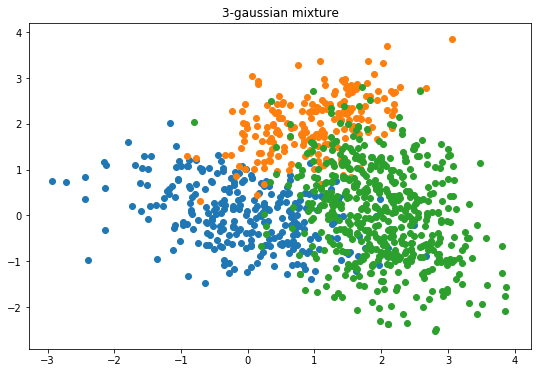

In [4]:
# Plot generated data
plt.figure(figsize=(9,6))
plt.plot()
plt.title("{}-gaussian mixture".format(K))
for gaussian_idx in range(K):
    plt.scatter(gmm_sample[:,0][xis[:,gaussian_idx]], gmm_sample[:,1][xis[:,gaussian_idx]])
plt.show()
plt.close()

-3.618522469190173 4.546741605758582 -3.17409434844833 4.487039074638637


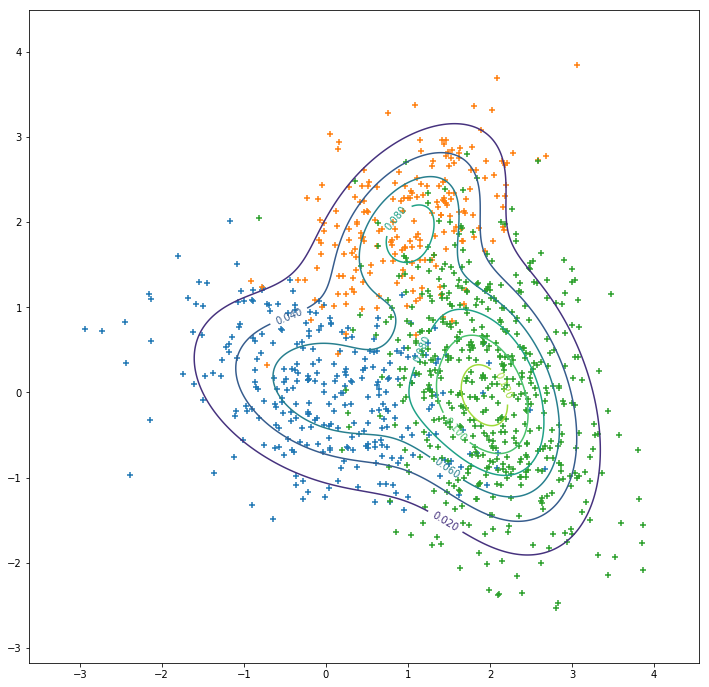

In [5]:
# Extract x and y
X = gmm_sample[:,0]
Y = gmm_sample[:,1]
# Define the borders
deltaX = (max(X) - min(X))/10
deltaY = (max(Y) - min(Y))/10
xmin = min(X) - deltaX
xmax = max(X) + deltaX
ymin = min(Y) - deltaY
ymax = max(Y) + deltaY
print(xmin, xmax, ymin, ymax)

normals = [None for _ in pis]
for idx, pi in enumerate(pis):
    normals[idx] = multivariate_normal(mus[idx],sigmas[idx])

def my_distrib(pos):
    return sum(pis[idx]*normal.pdf(pos) for idx, normal in enumerate(normals))

    
x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
pos = np.dstack((x, y))
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

if False:
    ax.contourf(x, y, my_distrib(pos))
else:
    cp = ax.contour(x, y, my_distrib(pos))
ax.clabel(cp, inline=True,
          fontsize=10)
for gaussian_idx in range(K):
    ax.scatter(gmm_sample[:,0][xis[:,gaussian_idx]], gmm_sample[:,1][xis[:,gaussian_idx]],marker='+')

The figure above shows the global distribution used to generate our data

-3.618522469190173 4.546741605758582 -3.17409434844833 4.487039074638637


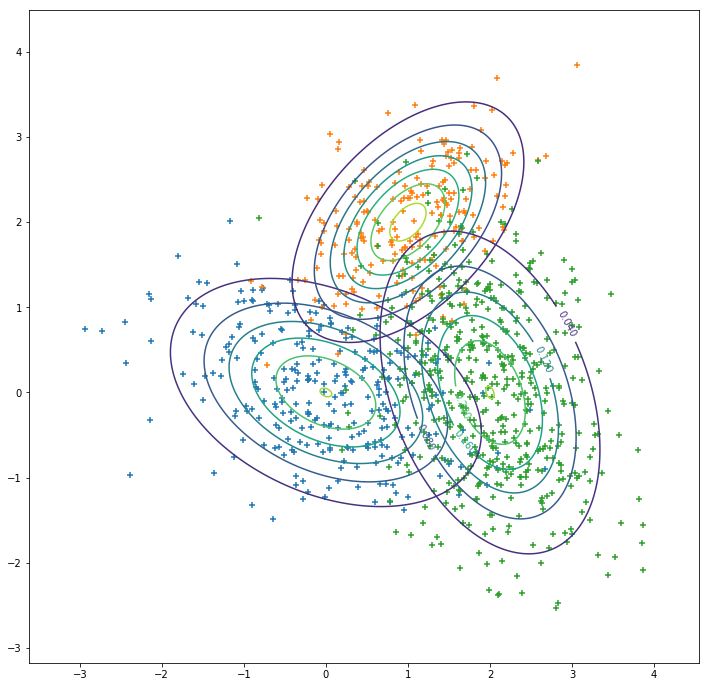

In [6]:
# Extract x and y
X = gmm_sample[:,0]
Y = gmm_sample[:,1]
# Define the borders
deltaX = (max(X) - min(X))/10
deltaY = (max(Y) - min(Y))/10
xmin = min(X) - deltaX
xmax = max(X) + deltaX
ymin = min(Y) - deltaY
ymax = max(Y) + deltaY
print(xmin, xmax, ymin, ymax)

normals = [None for _ in pis]
for idx, pi in enumerate(pis):
    normals[idx] = multivariate_normal(mus[idx],sigmas[idx])

    
x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
pos = np.dstack((x, y))
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

for normal in normals:
    cp = ax.contour(x, y, normal.pdf(pos))
ax.clabel(cp, inline=True,
          fontsize=10)
for gaussian_idx in range(K):
    ax.scatter(gmm_sample[:,0][xis[:,gaussian_idx]], gmm_sample[:,1][xis[:,gaussian_idx]],marker='+')

The picture above shows the 3 gaussian distributions used to generate our data

- EM Algorithm

In [7]:
"""

K mixtures
N samples
d dimension of the samples

"""

def comp_expectation(data, means, covariances, membership_weights, i, n):
    d = len(data[0])
    #eig_values, eig_vectors = np.linalg.eig(covariances[i])
    #log_det_sigma = sum([np.log(eig_values[j]) for j in range(len(eig_values))])
    _, log_det_sigma =np.linalg.slogdet(covariances[i])
    return( np.float(np.log(membership_weights[i]) - (d/2)*np.log(np.pi * 2) - (1/2)*log_det_sigma 
            - (1/2)*(data[n]-means[i])[np.newaxis,:].dot(np.linalg.inv(covariances[i]).dot((data[n]-means[i])[:,np.newaxis]))) )

def v_i(data, means, covariances, membership_weights, i, n):
    """
    Compute log(Pi_i * N(xn ; mu_i, sigma_i)) in a stable way
    """
    d = len(data[0])
    #eig_values, eig_vectors = np.linalg.eig(covariances[i])
    #log_det_sigma = sum([np.log(eig_values[j]) for j in range(len(eig_values))])
    _, log_det_sigma = np.linalg.slogdet(covariances[i])
    return( np.float(np.log(membership_weights[i]) - (d/2)*np.log(np.pi * 2) - (1/2)*log_det_sigma
            - (1/2)*(data[n]-means[i])[np.newaxis,:].dot(np.linalg.inv(covariances[i]).dot((data[n]-means[i])[:,np.newaxis]))) )

def sum_v_i(data, means, covariances, membership_weights, n):
    """
    Compute sum over i of log(Pi_i * N(xn ; mu_i, sigma_i)) in a stable way
    Log sum exp trick
    """
    K = len(means)
    all_v = [v_i(data, means, covariances, membership_weights, i, n) for i in range(K)]
    max_v = np.max(np.abs(all_v))
    return np.log(np.sum(np.exp(all_v + max_v))) - max_v

def M_step(data, gammas):
    """
    Maximization step
    We try to maximize the parameters given the weights w_ij
    gammas: R^{K*N}
    """
    # Simple variables for computations
    K = len(gammas)
    d = len(data[0])
    N = len(data)   
    
    Nk = gammas.sum(axis=1)

    means = [1/Nk[j] * (np.array([[gammas[i,n]*data[n] for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    covariances = [1/Nk[j] * (np.array([[gammas[i,n]*(data[n]-means[i])[:,np.newaxis].dot((data[n]-means[i])[np.newaxis,:]) for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    pis = Nk/N
    
    return means, covariances, pis

def E_step(data, means, covariances, membership_weights):
    """
    Estimation step
    We compute w_ij given the current parameters
    means: R^{K*d}
    covariances: R^{K*d*d}
    membership_weights: R^{K} ( pi_k )
    """
    # Simple variables for computations
    K = len(membership_weights)
    d = len(data[0])
    N = len(data)
    
    log_normalisation = np.array([sum_v_i(data, means, covariances, membership_weights, n) for n in range(N)])
    log_gamma_k = []
    for gaussian_idx in range(K):
        log_gamma_k.append(np.array([v_i(data, means, covariances, membership_weights, gaussian_idx, n) for n in range(N)]) - log_normalisation)
    
    log_gamma_k = np.array(log_gamma_k)
    gamma_k = np.exp(log_gamma_k)
    
    log_expectation = np.sum([[gamma_k[i,n]*comp_expectation(data, means, covariances, membership_weights, i, n) for i in range(K)] for n in range(N)])
    
    # TODO: Change det to https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.slogdet.html#numpy.linalg.slogdet

    return log_expectation, gamma_k

def EM(data, epsilon, means_0, covariances_0, membership_weights_0):
    """
    EM Algorithm
    epsilon: threshold
    """
    
    delta = 1000
    
    means_t = means_0
    covariances_t = covariances_0
    membership_weights_t = membership_weights_0
    
    value_t_1, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                                 membership_weights = membership_weights_t)
    
    while delta > epsilon :
        means_t, covariances_t, membership_weights_t = M_step(data = data, gammas = gammas_t)
        value_t, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                                   membership_weights = membership_weights_t)
        delta = value_t - value_t_1
        value_t_1 = value_t
        
    return means_t, covariances_t, membership_weights_t

In [8]:
# UNSTABLE ONE

"""

K mixtures
N samples
d dimension of the samples

"""

def comp_expectation_unstable(data, means, covariances, membership_weights,i,n):
    d = len(data[0])
    return( np.float(np.log(membership_weights[i]) - (d/2)*np.log(np.pi * 2) - (1/2)*np.log(np.linalg.det(covariances[i])) 
             - (1/2)*(data[n] - means[i])[np.newaxis,:].dot(np.linalg.inv(covariances[i]).dot((data[n] - means[i])[:,np.newaxis]))) )


def M_step_unstable(data, gammas):
    """
    Maximization step
    We try to maximize the parameters given the weights w_ij
    gammas: R^{K*N}
    """
    # Simple variables for computations
    K = len(gammas)
    d = len(data[0])
    N = len(data)   
    
    Nk = gammas.sum(axis=1)

    means = [1/Nk[j] * (np.array([[gammas[i,n]*data[n] for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    covariances = [1/Nk[j] * (np.array([[gammas[i,n]*(data[n]-means[i])[:,np.newaxis].dot((data[n]-means[i])[np.newaxis,:]) for i in range(K)] for n in range(N)]).sum(axis=0))[j] for j in range(K)]
    pis = Nk/N
    
    return means, covariances, pis

def E_step_unstable(data, means, covariances, membership_weights):
    """
    Estimation step
    We compute w_ij given the current parameters
    means: R^{K*d}
    covariances: R^{K*d*d}
    membership_weights: R^{K} ( pi_k )
    """
    # Simple variables for computations
    K = len(membership_weights)
    d = len(data[0])
    N = len(data)
    
    normalisation = np.array([membership_weights[i]*scipy.stats.multivariate_normal.pdf(gmm_sample, mean=means[i], cov=covariances[i]) for i in range(K)]).sum(axis=0)
    gamma_k = []
    for gaussian_idx in range(K):
        gamma_k.append(membership_weights[gaussian_idx]*scipy.stats.multivariate_normal.pdf(gmm_sample, mean=means[gaussian_idx], cov=covariances[gaussian_idx])/normalisation)
    gamma_k = np.array(gamma_k)
    
    log_exp = np.sum([[gamma_k[i,n]*comp_expectation_unstable(data, means, covariances, membership_weights, i, n) for i in range(K)] for n in range(N)])
    
    # TODO: Change det to https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.slogdet.html#numpy.linalg.slogdet
    
    return log_exp, gamma_k

def EM(data, epsilon, means_0, covariances_0, membership_weights_0):
    """
    EM Algorithm
    """
    
    delta = 1000
    
    means_t = means_0
    covariances_t = covariances_0
    membership_weights_t = membership_weights_0
    
    value_t_1, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                                 membership_weights = membership_weights_t)
    
    while delta > epsilon :
        means_t, covariances_t, membership_weights_t = M_step(data = data, gammas = gammas_t)
        value_t, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                               membership_weights = membership_weights_t)
        delta = value_t - value_t_1
        value_t_1 = value_t
    return means_t, covariances_t, membership_weights_t

In [9]:
def EM_generator(data, epsilon, means_0, covariances_0, membership_weights_0):
    """
    EM Algorithm
    """
    
    delta = 1000
    
    means_t = means_0
    covariances_t = covariances_0
    membership_weights_t = membership_weights_0
    value_t_1, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                                 membership_weights = membership_weights_t)
    yield means_t, covariances_t, membership_weights_t, delta, value_t_1
    
    while delta > epsilon :
        means_t, covariances_t, membership_weights_t = M_step(data = data, gammas = gammas_t)
        value_t, gammas_t = E_step(data = data, means = means_t, covariances = covariances_t,
                               membership_weights = membership_weights_t)
        delta = value_t - value_t_1
        value_t_1 = value_t
        
        yield means_t, covariances_t, membership_weights_t, delta, value_t_1

In [10]:
value, gammas = E_step(data=gmm_sample,
                       means=np.array(mus), 
                       covariances=np.array(sigmas),
                       membership_weights=np.ones(3)/3)

In [11]:
value_u, gammas_u = E_step_unstable(data=gmm_sample,
                       means=np.array(mus), 
                       covariances=np.array(sigmas),
                       membership_weights=np.ones(3)/3)

In [12]:
display(value_u)
display(value)
display(gammas_u)
display(gammas)

-3428.7662119816205

-3428.7662119816205

array([[9.85933788e-01, 4.70373312e-01, 4.69699386e-02, ...,
        8.82161790e-01, 9.35921652e-01, 8.52007474e-01],
       [1.38513299e-02, 3.78659966e-06, 1.57047945e-08, ...,
        6.13980194e-03, 3.48448523e-02, 8.12912760e-03],
       [2.14882411e-04, 5.29622901e-01, 9.53030046e-01, ...,
        1.11698408e-01, 2.92334959e-02, 1.39863399e-01]])

array([[9.85933788e-01, 4.70373312e-01, 4.69699386e-02, ...,
        8.82161790e-01, 9.35921652e-01, 8.52007474e-01],
       [1.38513299e-02, 3.78659966e-06, 1.57047945e-08, ...,
        6.13980194e-03, 3.48448523e-02, 8.12912760e-03],
       [2.14882411e-04, 5.29622901e-01, 9.53030046e-01, ...,
        1.11698408e-01, 2.92334959e-02, 1.39863399e-01]])

In [13]:
m,c,p = M_step(data=gmm_sample, gammas = gammas)

In [14]:
m_u,c_u,p_u = M_step_unstable(data=gmm_sample, gammas = gammas)

In [15]:
display(m)
display(m_u)
display(c)
display(c_u)
display(p)
display(p_u)

[array([ 0.15027355, -0.03607822]),
 array([1.03323796, 1.89772148]),
 array([ 2.06853032, -0.02728967])]

[array([ 0.15027355, -0.03607822]),
 array([1.03323796, 1.89772148]),
 array([ 2.06853032, -0.02728967])]

[array([[ 1.07132655, -0.29725904],
        [-0.29725904,  0.51983446]]), array([[0.53224616, 0.21422374],
        [0.21422374, 0.46207545]]), array([[ 0.45485732, -0.20102975],
        [-0.20102975,  0.95064615]])]

[array([[ 1.07132655, -0.29725904],
        [-0.29725904,  0.51983446]]), array([[0.53224616, 0.21422374],
        [0.21422374, 0.46207545]]), array([[ 0.45485732, -0.20102975],
        [-0.20102975,  0.95064615]])]

array([0.31384415, 0.24346062, 0.44269523])

array([0.31384415, 0.24346062, 0.44269523])

In [16]:
E_step(data=gmm_sample,
       means=np.array(mus), 
       covariances=np.array(sigmas),
       membership_weights=np.ones((3))/3)

(-3428.7662119816205,
 array([[9.85933788e-01, 4.70373312e-01, 4.69699386e-02, ...,
         8.82161790e-01, 9.35921652e-01, 8.52007474e-01],
        [1.38513299e-02, 3.78659966e-06, 1.57047945e-08, ...,
         6.13980194e-03, 3.48448523e-02, 8.12912760e-03],
        [2.14882411e-04, 5.29622901e-01, 9.53030046e-01, ...,
         1.11698408e-01, 2.92334959e-02, 1.39863399e-01]]))

In [17]:
E_step_unstable(data=gmm_sample,
       means=np.array(mus), 
       covariances=np.array(sigmas),
       membership_weights=np.ones((3))/3)

(-3428.7662119816205,
 array([[9.85933788e-01, 4.70373312e-01, 4.69699386e-02, ...,
         8.82161790e-01, 9.35921652e-01, 8.52007474e-01],
        [1.38513299e-02, 3.78659966e-06, 1.57047945e-08, ...,
         6.13980194e-03, 3.48448523e-02, 8.12912760e-03],
        [2.14882411e-04, 5.29622901e-01, 9.53030046e-01, ...,
         1.11698408e-01, 2.92334959e-02, 1.39863399e-01]]))

In [18]:
def initialize(d, estimated_components, sample):
    """
    Function to initialize according to the parameters of the model
    """
    mini_ = np.max(sample, axis = 0)
    maxi_ = np.min(sample, axis = 0)
    means_0 = np.random.rand(estimated_components,d)*(maxi_ - mini_)+mini_ # We could consider something a bit smarter as values in [0,1]
    covariances_0=np.random.rand(estimated_components,d,d)*(maxi_ - mini_) # Same here
    for idx, matrix in enumerate(covariances_0):
        covariances_0[idx] = np.transpose(matrix)@matrix
    membership_weights_0 = np.random.rand(estimated_components)
    membership_weights_0 /= np.sum(membership_weights_0)
    return means_0, covariances_0, membership_weights_0

In [ ]:
# Extract x and y
X = gmm_sample[:,0]
Y = gmm_sample[:,1]
# Define the borders
deltaX = (max(X) - min(X))/10
deltaY = (max(Y) - min(Y))/10
xmin = min(X) - deltaX
xmax = max(X) + deltaX
ymin = min(Y) - deltaY
ymax = max(Y) + deltaY
print(xmin, xmax, ymin, ymax)

# TODO: Compute log-likelihood
max_iter = 100
estimated_components = 3
d = len(mus[0])
np.random.seed(0)
means_0, covariances_0, membership_weights_0 = initialize(d=d, estimated_components=estimated_components, sample=gmm_sample)

delta = None
means = means_0
membership_weights = membership_weights_0
value = None
log_likes = list()

with tqdm(enumerate(EM_generator(data=gmm_sample,
                       means_0=means_0, 
                       covariances_0=covariances_0,
                       membership_weights_0=membership_weights_0,
                       epsilon=1e-3)),
                       total = max_iter, 
                       postfix={'delta': delta,
                                'Log-Likelihood': value, 
                                'means':means,
                                'membership_weights':membership_weights}) as pbar:
    
    for t, (means, covariances, membership_weights, delta, value) in pbar:
        pbar.set_postfix({'delta': delta,
                            'Log-Likelihood': value, 
                            'means':means,
                            'membership_weights':membership_weights})
        normals = [None for _ in membership_weights]
        for idx, _ in enumerate(membership_weights):
            normals[idx] = multivariate_normal(means[idx],covariances[idx])

        def my_distrib(pos):
            return sum(membership_weights[idx]*normal.pdf(pos) for idx, normal in enumerate(normals))


        x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
        pos = np.dstack((x, y))
        fig = plt.figure(figsize=(12,12))
        ax = fig.add_subplot(111)

        if False:
            ax.contourf(x, y, my_distrib(pos))
        else:
            cp = ax.contour(x, y, my_distrib(pos))
        ax.clabel(cp, inline=True,
                  fontsize=10)
        for gaussian_idx in range(K):
            ax.scatter(gmm_sample[:,0][xis[:,gaussian_idx]], gmm_sample[:,1][xis[:,gaussian_idx]],marker='+')
        plt.title("Distribution estimated at the {}-step of the EM algorithm".format(t))
        plt.savefig("./plots/em_algorithm_t_{}.png".format(str(t).zfill(4)))
        plt.savefig("./plots/em_algorithm_t_{}.svg".format(str(t).zfill(4)))
        plt.close()
        log_likes.append(value)
        if  t > max_iter:
            print('Reach max_iteration={}'.format(max_iter))
            break

-3.618522469190173 4.546741605758582 -3.17409434844833 4.487039074638637


  0%| | 0/100 [00:00<?, ?it/s, Log-Likelihood=None, delta=None, means=[[ 0.13196361 -0.71735634]
 [-0.23513218  0.36992565]
  0%| | 0/100 [00:03<?, ?it/s, delta=1000, Log-Likelihood=-5.59e+3, means=[[ 0.13196361 -0.71735634]
 [-0.23513218  0.36992565]
  1%| | 1/100 [00:04<08:14,  4.99s/it, delta=1000, Log-Likelihood=-5.59e+3, means=[[ 0.13196361 -0.71735634]
 [-0.23513218  0.36992565]
 51%|▌| 51/100 [04:56<04:41,  5.74s/it, delta=0.237, Log-Likelihood=-3.43e+3, means=[array([ 2.19531008, -0.48924995]), array([0.01626886, 0.0243923 ]), array([1.37172853, 1.42307961])], membership_weights=[0.29765017 0.29689115 0.40545868]]  

<img src="./em_algorithm_t_0060.png">

In [ ]:
# Log-log plot of the likelihood skipping first step
fig = plt.figure(figsize=(12,12))
plt.title("Log-Log plot of the likelihood w.r.t. the step of the EM algorithm (skipping the first step)")
ax = fig.add_subplot(111)
ax.plot(np.log(range(1,len(log_likes))), log_likes[1:])

In [ ]:
fig = plt.figure(figsize=(12,12))
plt.title("Log-Log plot of the likelihood w.r.t. the step of the EM algorithm")
ax = fig.add_subplot(111)
ax.plot(np.log(range(1,len(log_likes)+1)), log_likes)

In [ ]:
log_likes = list()
np.random.seed(0)

for k in range(10):
    # TODO: Compute log-likelihood
    max_iter = 100
    estimated_components = 3
    d = len(mus[0])
    means_0, covariances_0, membership_weights_0 = initialize(d=d, estimated_components=estimated_components, sample=gmm_sample)

    log_likes_sub = list()
    with tqdm(enumerate(EM_generator(data=gmm_sample,
                           means_0=means_0, 
                           covariances_0=covariances_0,
                           membership_weights_0=membership_weights_0,
                           epsilon=1e-3)),
                           total = max_iter, 
                           postfix={'delta': delta,
                                    'Log-Likelihood': value, 
                                    'means':means,
                                    'membership_weights':membership_weights}) as pbar:

        for t, (means, covariances, membership_weights, delta, value) in pbar:
            log_likes_sub.append(value)
    log_likes.append(log_likes_sub[:])

In [ ]:
fig = plt.figure(figsize=(12,12))
plt.title("Log-Log plot of the likelihood w.r.t. the step of the EM algorithm for different initialisations (skipping the first step)")
ax = fig.add_subplot(111)
NUM_COLORS = 10
cm = plt.get_cmap('gist_rainbow')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i, log_like in enumerate(log_likes):
    if len(log_like)>2:
        ax.plot(np.log(range(2,len(log_like)+1)), log_like[1:])
plt.show()

The figure above represents the log-log plot of the likelihood according to the step of the algorithm, skipping the first step, for different initialisations.
We can see that the algorithm is really dependent to the initialisation and although the estimation of the global density is good, the estimations gaussian to gaussian is not that good.

## Animation with celluloid

In [ ]:
from celluloid import Camera

# Extract x and y
X = gmm_sample[:,0]
Y = gmm_sample[:,1]
# Define the borders
deltaX = (max(X) - min(X))/10
deltaY = (max(Y) - min(Y))/10
xmin = min(X) - deltaX
xmax = max(X) + deltaX
ymin = min(Y) - deltaY
ymax = max(Y) + deltaY
print(xmin, xmax, ymin, ymax)

# TODO: Compute log-likelihood
max_iter = 100
estimated_components = 3
d = len(mus[0])
np.random.seed(0)
means_0, covariances_0, membership_weights_0 = initialize(d=d, estimated_components=estimated_components, sample=gmm_sample)

delta = None
means = means_0
membership_weights = membership_weights_0
value = None
log_likes = list()

fig = plt.figure(figsize=(12,12))
camera = Camera(fig)

with tqdm(enumerate(EM_generator(data=gmm_sample,
                       means_0=means_0, 
                       covariances_0=covariances_0,
                       membership_weights_0=membership_weights_0,
                       epsilon=1e-3)),
                       total = max_iter, 
                       postfix={'delta': delta,
                                'Log-Likelihood': value, 
                                'means':means,
                                'membership_weights':membership_weights}) as pbar:
    
    for t, (means, covariances, membership_weights, delta, value) in pbar:
        pbar.set_postfix({'delta': delta,
                            'Log-Likelihood': value, 
                            'means':means,
                            'membership_weights':membership_weights})
        normals = [None for _ in membership_weights]
        for idx, _ in enumerate(membership_weights):
            normals[idx] = multivariate_normal(means[idx],covariances[idx])

        def my_distrib(pos):
            return sum(membership_weights[idx]*normal.pdf(pos) for idx, normal in enumerate(normals))


        x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
        pos = np.dstack((x, y))
        
        ax = fig.add_subplot(111)

        if False:
            ax.contourf(x, y, my_distrib(pos))
        else:
            cp = ax.contour(x, y, my_distrib(pos))
        ax.clabel(cp, inline=True,
                  fontsize=10)
        color_dict = {
            0:'red',
            1:'blue',
            2:'green'
        }
        for gaussian_idx in range(K):
            ax.scatter(gmm_sample[:,0][xis[:,gaussian_idx]], gmm_sample[:,1][xis[:,gaussian_idx]],marker='+',c=color_dict[gaussian_idx])
        camera.snap()
        
        log_likes.append(value)
        if  t > max_iter:
            print('Reach max_iteration={}'.format(max_iter))
            break

In [ ]:
animation = camera.animate()
animation.save('animation.mp4')

In [ ]:
from celluloid import Camera

# Extract x and y
X = gmm_sample[:,0]
Y = gmm_sample[:,1]
# Define the borders
deltaX = (max(X) - min(X))/10
deltaY = (max(Y) - min(Y))/10
xmin = min(X) - deltaX
xmax = max(X) + deltaX
ymin = min(Y) - deltaY
ymax = max(Y) + deltaY
print(xmin, xmax, ymin, ymax)

# TODO: Compute log-likelihood
max_iter = 100
estimated_components = 3
d = len(mus[0])
np.random.seed(0)
means_0 = np.random.rand(estimated_components,d)
covariances_0=np.random.rand(estimated_components,d,d)
for idx, matrix in enumerate(covariances_0):
    covariances_0[idx] = np.transpose(matrix)@matrix

membership_weights_0 = np.random.rand(estimated_components)
membership_weights_0 /= np.sum(membership_weights_0)

delta = None
means = means_0
membership_weights = membership_weights_0
value = None
log_likes = list()

fig = plt.figure(figsize=(12,12))
camera = Camera(fig)

with tqdm(enumerate(EM_generator(data=gmm_sample,
                       means_0=means_0, 
                       covariances_0=covariances_0,
                       membership_weights_0=membership_weights_0,
                       epsilon=1e-20)),
                       total = max_iter, 
                       postfix={'delta': delta,
                                'Log-Likelihood': value, 
                                'means':means,
                                'membership_weights':membership_weights}) as pbar:
    
    for t, (means, covariances, membership_weights, delta, value) in pbar:
        pbar.set_postfix({'delta': delta,
                            'Log-Likelihood': value, 
                            'means':means,
                            'membership_weights':membership_weights})
        normals = [None for _ in membership_weights]
        for idx, _ in enumerate(membership_weights):
            normals[idx] = multivariate_normal(means[idx],covariances[idx])

        x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
        pos = np.dstack((x, y))
        
        ax = fig.add_subplot(111)

        for idx, normal in enumerate(normals):
            cp = ax.contour(x, y, normal.pdf(pos))
        ax.clabel(cp, inline=True,
                  fontsize=10)
        color_dict = {
            0:'red',
            1:'blue',
            2:'green'
        }
        for gaussian_idx in range(K):
            ax.scatter(gmm_sample[:,0][xis[:,gaussian_idx]], gmm_sample[:,1][xis[:,gaussian_idx]],marker='+',c=color_dict[gaussian_idx])
        camera.snap()
        
        log_likes.append(value)
        if  t > max_iter:
            print('Reach max_iteration={}'.format(max_iter))
            break
animation = camera.animate()
animation.save('animation_2.mp4')